# WeatherPy
----

## Note:  SEE END OF NOTEBOOK FOR DATA ANALYSIS

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#response = requests.get(query_url + "London")
#pprint(response.json())


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_data = []
i = 0


# Loop through the list of cities and perform a request for data on each
for city in cities[:-1]:
    i = i + 1
    try:
        response = requests.get(query_url + city).json()
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp']
        cloud = response["clouds"]["all"]
        speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        humidity = response["main"]["humidity"]
        date = response["dt"]
        weather_data.append([city,country,date,lat,long,temp,cloud,speed,humidity])
        print(f"counter {i},  {city}")
        time.sleep(.2)
    except:
        print("City not found.")

counter 1,  port alfred
counter 2,  hilo
counter 3,  hermanus
counter 4,  puerto ayora
counter 5,  ndele
counter 6,  georgetown
counter 7,  butaritari
counter 8,  kirakira
counter 9,  busselton
counter 10,  atuona
counter 11,  tiksi
counter 12,  barrow
counter 13,  ushuaia
counter 14,  shahr-e kord
counter 15,  avarua
counter 16,  mataura
counter 17,  mangrol
counter 18,  cidreira
City not found.
counter 20,  tomohon
City not found.
counter 22,  vila velha
counter 23,  bredasdorp
counter 24,  thompson
counter 25,  pestravka
counter 26,  santa cruz
counter 27,  pevek
counter 28,  saint-philippe
counter 29,  saskylakh
counter 30,  tabas
counter 31,  touros
counter 32,  half moon bay
counter 33,  airai
counter 34,  hohhot
counter 35,  atasu
counter 36,  gat
City not found.
counter 38,  chacaltianguis
counter 39,  tuatapere
counter 40,  wiesbaden
counter 41,  rikitea
counter 42,  victor harbor
counter 43,  mahanoro
counter 44,  albany
counter 45,  yar-sale
counter 46,  sulat
counter 47,  k

counter 367,  tarko-sale
counter 368,  san policarpo
City not found.
counter 370,  sitka
counter 371,  iralaya
counter 372,  teya
counter 373,  saint-augustin
counter 374,  te anau
counter 375,  hayden
counter 376,  inhambane
counter 377,  neon monastirion
counter 378,  hami
counter 379,  inirida
counter 380,  intipuca
counter 381,  faanui
City not found.
counter 383,  serra talhada
counter 384,  vangaindrano
counter 385,  santo antonio do leverger
counter 386,  kaseda
City not found.
counter 388,  pantai remis
counter 389,  pangkalanbuun
City not found.
counter 391,  shu
counter 392,  buala
counter 393,  gladstone
counter 394,  bonavista
counter 395,  mercedes
counter 396,  filadelfia
counter 397,  peniche
counter 398,  nome
counter 399,  harper
counter 400,  newport
counter 401,  wanning
counter 402,  rabo de peixe
counter 403,  bereda
counter 404,  colesberg
City not found.
counter 406,  murgab
counter 407,  russellville
counter 408,  katobu
counter 409,  santander jimenez
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp

weather_data = pd.DataFrame(weather_data, columns=["City", "Country", "Date", "Lat", "Lon", "Max Temp", 
                                           "Cloudiness", "Wind Speed", "Humidity"])
weather_data.to_csv("../output_data/weather_data.csv")
weather_data

,City,Country,Date,Lat,Lon,Max Temp,Cloudiness,Wind Speed,Humidity
0,port alfred,ZA,1586652405,-33.59,26.89,18.33,40,1.34,83
1,hilo,US,1586652298,19.73,-155.09,23.78,90,4.10,69
2,hermanus,ZA,1586652266,-34.42,19.23,16.97,100,8.05,93
3,puerto ayora,EC,1586652739,-0.74,-90.35,27.16,75,5.10,74
4,ndele,CF,1586652739,8.41,20.65,23.58,99,1.57,73
...,...,...,...,...,...,...,...,...,...
531,salto del guaira,PY,1586653059,-24.06,-54.31,16.95,0,1.03,49
532,khandyga,RU,1586653060,62.67,135.60,-0.77,100,2.80,96
533,bradford,GB,1586652896,53.79,-1.75,8.50,5,1.50,93
534,burns lake,CA,1586653061,54.23,-125.75,5.32,14,1.14,45


In [6]:
#data=[]
#i=0
#for city in cities[:10]:
#    print(city)
#    json = requests.get(query_url + city).json()
#    i=i+1
#    try:
#        tempmax=json["main"]['temp_max']
#        humidity=json["main"]["humidity"]
#        speed=json['wind']["speed"]
#        cloudiness=json["clouds"]["all"]
#        lat=json["coord"]["lat"]
#        country=json['sys']["country"]
#        date=json['dt']
#        lon=json["coord"]["lon"]
#        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
#        print(f"counter {i} || {city}")
#        time.sleep(.1)
#    except:
#        print("city not found")

#### Latitude vs. Temperature Plot

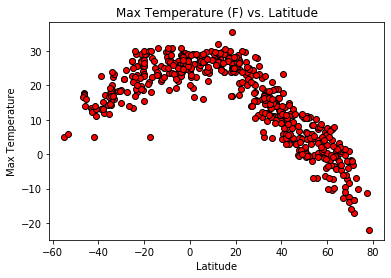

In [7]:
#* Temperature (F) vs. Latitude
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],c="red",edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Max Temperature (F) vs. Latitude")
plt.savefig('../Images/temp_v_lat.png')
plt.show();


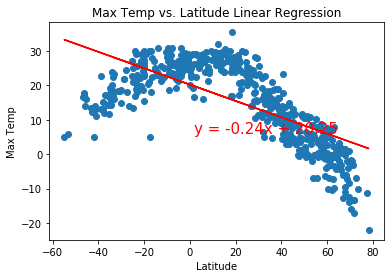

In [8]:
#Max Temperature x Latitude
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_temp_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

In [10]:
#data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
#data_df.head()

#### Latitude vs. Humidity Plot

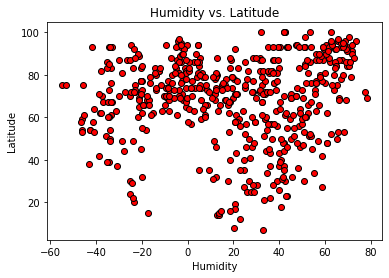

In [27]:
#* Humidity (%) vs. Latitude
plt.scatter(weather_data["Lat"],weather_data["Humidity"],c="red",edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude")
plt.savefig('../Images/humid_v_lat.png')
plt.show();

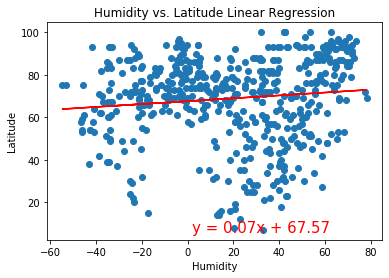

In [28]:
#Humidity x Latitude
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_humid_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Cloudiness

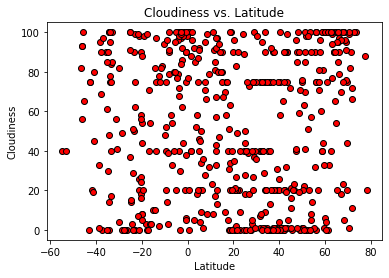

In [13]:
#* Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],c="red",edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude")
plt.savefig('../Images/cloudiness_v_lat.png')
plt.show();

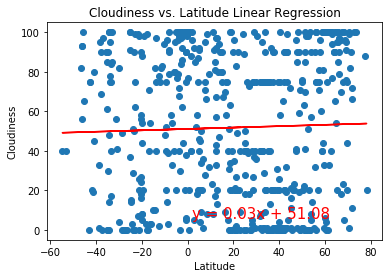

In [14]:
#Cloudiness x Latitude
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_cloud_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

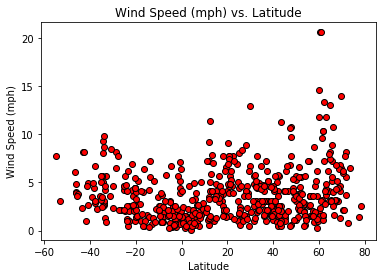

In [15]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],c="red",edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig('../Images/wind_v_lat.png')
plt.show();

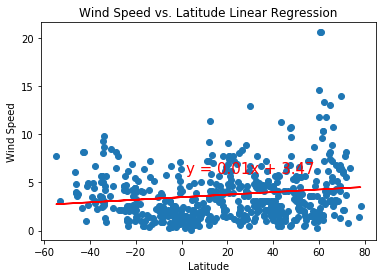

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

#WindSpeed x Latitude
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_wind_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data[weather_data["Lat"] > 0 ]
northern

,City,Country,Date,Lat,Lon,Max Temp,Cloudiness,Wind Speed,Humidity
1,hilo,US,1586652298,19.73,-155.09,23.78,90,4.10,69
4,ndele,CF,1586652739,8.41,20.65,23.58,99,1.57,73
5,georgetown,MY,1586652631,5.41,100.34,27.88,20,1.17,88
6,butaritari,KI,1586652449,3.07,172.79,28.89,85,4.62,74
10,tiksi,RU,1586652454,71.69,128.87,-13.31,66,8.16,91
...,...,...,...,...,...,...,...,...,...
529,kashmor,PK,1586653058,28.43,69.58,28.17,75,1.23,28
532,khandyga,RU,1586653060,62.67,135.60,-0.77,100,2.80,96
533,bradford,GB,1586652896,53.79,-1.75,8.50,5,1.50,93
534,burns lake,CA,1586653061,54.23,-125.75,5.32,14,1.14,45


In [18]:
southern = weather_data[weather_data["Lat"] < 0 ]
southern

,City,Country,Date,Lat,Lon,Max Temp,Cloudiness,Wind Speed,Humidity
0,port alfred,ZA,1586652405,-33.59,26.89,18.33,40,1.34,83
2,hermanus,ZA,1586652266,-34.42,19.23,16.97,100,8.05,93
3,puerto ayora,EC,1586652739,-0.74,-90.35,27.16,75,5.10,74
7,kirakira,SB,1586652741,-10.45,161.92,29.74,94,3.45,70
8,busselton,AU,1586652741,-33.65,115.33,22.54,84,4.17,61
...,...,...,...,...,...,...,...,...,...
522,santiago,CL,1586652772,-33.46,-70.65,17.00,75,4.60,67
523,conde,BR,1586653054,-7.26,-34.91,26.00,58,3.10,88
524,manggar,ID,1586653055,-2.88,108.27,27.45,100,2.54,80
530,cairns,AU,1586653007,-16.92,145.77,29.93,40,0.50,66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

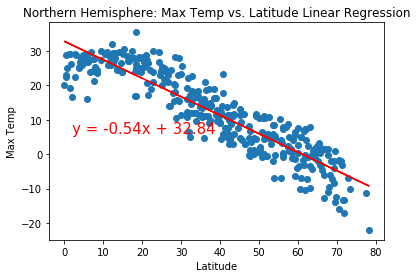

In [19]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_northern_temp_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

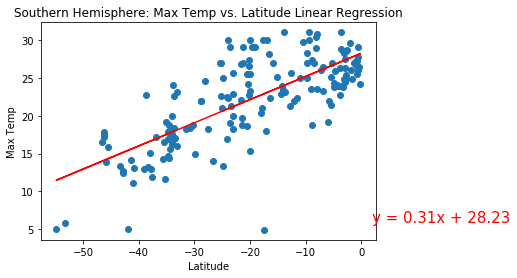

In [20]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_southern_temp_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

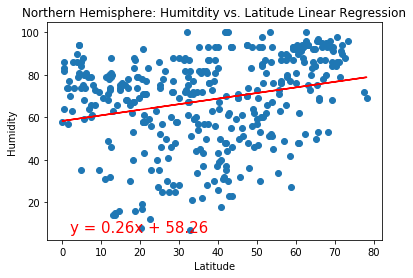

In [21]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere: Humitdity vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_northern_humid_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

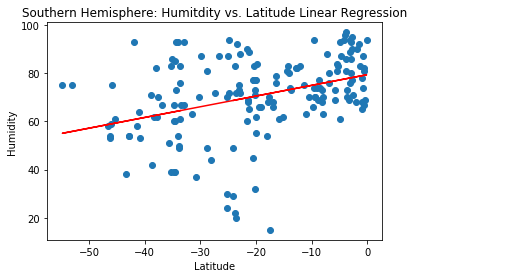

In [22]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere: Humitdity vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_southern_temp_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

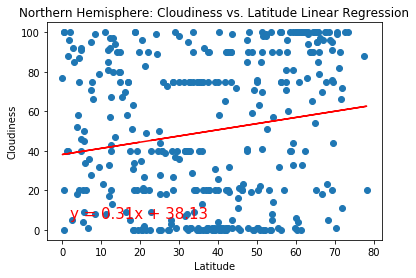

In [23]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_northern_cloud_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

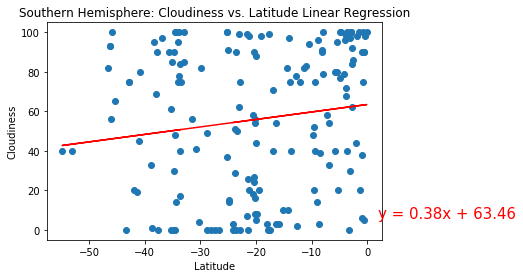

In [24]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_southern_cloud_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

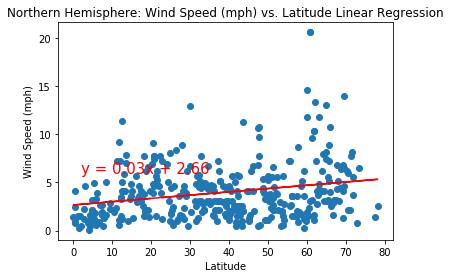

In [25]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_northern_wind_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

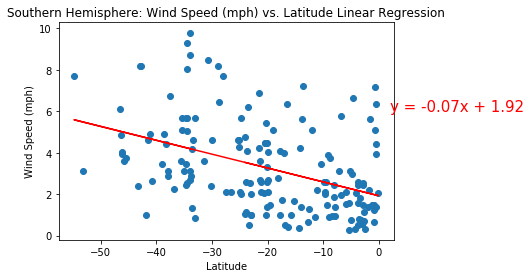

In [26]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.savefig('../Images/regres_southern_wind_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red");

### Observable Data Trends 
* Global Temperature was found to be negatively correlated with latitude (r2 = -0.69) ; With largest portion of earth land mass being principally located above -40 degrees latitude, we can see that equatorial city tempertures are greater temperatures for the absolute values of higher latitudes.  This trend becomes more apparent when we look at hemispheric tempheratures. The Northern hemispheric temperatures show a strong negative correlation with latitude, r2 = -0.91.  Conversly a positive correlation can be observed for the southern hemisphere as latitudes of -60 approach the equator. Southern hemispheric temperatures show a strong positive correlation with latitude of r2 = 0.74.   

* Cloudiness and windspeed and humidity are not correlated with latitude. When examined hemispherically, Northern hemispheric r2 values for cloudiness, windspeed, and humidity are slightly stronger although not significat at r2 = 0.17, 0.25, 0.24 respectively.  Southern hemispheric r2 values for cloudiness, windspeed, and humidity are  0.15, 0.37, and -0.43 respectively. Stronger r2 values are observed for Southern hemispheric Wind speed and humidiy, and approach significant r2 values with latitude but remain less than 50% significance. 

* Global Humity and Cloudiness show a slight but not significant positive correlation (r2 = 0.30).  Neither Humidity nor cloudiness was correlated with latitude. 

In [34]:
weather_data[["Lat", "Max Temp","Cloudiness","Humidity", "Wind Speed"]].corr()

,Lat,Max Temp,Cloudiness,Humidity,Wind Speed
Lat,1.000000,-0.685000,0.030738,0.109858,0.158738
Max Temp,-0.685000,1.000000,-0.054210,-0.201153,-0.170343
Cloudiness,0.030738,-0.054210,1.000000,0.303157,0.105906
Humidity,0.109858,-0.201153,0.303157,1.000000,-0.053212
Wind Speed,0.158738,-0.170343,0.105906,-0.053212,1.000000


In [32]:
northern[["Lat", "Max Temp", "Cloudiness", "Humidity", "Wind Speed"]].corr()

,Lat,Max Temp,Cloudiness,Humidity,Wind Speed
Lat,1.000000,-0.914845,0.170520,0.248757,0.237347
Max Temp,-0.914845,1.000000,-0.138284,-0.309141,-0.125359
Cloudiness,0.170520,-0.138284,1.000000,0.309056,0.157875
Humidity,0.248757,-0.309141,0.309056,1.000000,0.004431
Wind Speed,0.237347,-0.125359,0.157875,0.004431,1.000000


In [33]:
southern[["Lat", "Max Temp", "Cloudiness", "Humidity", "Wind Speed"]].corr()

,Lat,Max Temp,Cloudiness,Humidity,Wind Speed
Lat,1.000000,0.738929,0.145223,0.373363,-0.429559
Max Temp,0.738929,1.000000,0.111859,0.131877,-0.218408
Cloudiness,0.145223,0.111859,1.000000,0.280828,-0.009484
Humidity,0.373363,0.131877,0.280828,1.000000,-0.246094
Wind Speed,-0.429559,-0.218408,-0.009484,-0.246094,1.000000
